In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import pandas as pd
import numpy as np 
import skfuzzy
import math
import cv2
import os

## Image Preprocessing

In [2]:
# directory which contains the image dataset
DATADIR = "C:/Users/Vern Sin/Documents/Jupyter/FuzzyLogic/assignment_data"

# there are 3 category in the dataset
CATEGORIES = ["unripe", "underripe","ripe"]

In [3]:
def img_preprocessing(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (10, 55, 55), (70, 255, 255))

    maskedImg = cv2.cvtColor(cv2.bitwise_and(image, image, mask=mask), cv2.COLOR_BGR2RGB)
    
    return cv2.mean(image, mask)

In [4]:
# get the image dataset by looping through categories in data directory
mean_rgb = []

def get_data():
    Data = []
    class_counter = 1
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_label = CATEGORIES.index(category)
        
        for image in os.listdir(path):
            img_ary = cv2.imread(os.path.join(path, image))
            meanRGB = img_preprocessing(img_ary)
            temp_list = []
            temp_list.append(meanRGB[2])
            temp_list.append(meanRGB[1])
            temp_list.append(meanRGB[0])
            temp_list.append(class_counter)
            mean_rgb.append(temp_list)
        class_counter+=1

get_data()

In [5]:
mean_rgb

[[86.04728829639242, 101.70805007053919, 32.251598806486655, 1],
 [93.8999266970107, 111.5044671430586, 32.21011457272726, 1],
 [89.63474147117866, 107.29339723696204, 32.55864227277359, 1],
 [85.71568856628527, 106.59877005700176, 25.163757639692236, 1],
 [83.38961526102669, 102.65439934863345, 32.65876227553266, 1],
 [73.38940731721311, 90.263916921135, 26.56035138942899, 1],
 [83.04773779165664, 104.03214020220541, 31.81465713667349, 1],
 [96.85963883258106, 118.94797775109132, 36.8297503022086, 1],
 [77.49537714040194, 94.15777280567397, 25.00755927624109, 1],
 [108.83938059664571, 124.08300994409538, 37.93154306634344, 1],
 [99.75396458509209, 121.26295709993873, 38.05999810079756, 1],
 [94.98968789952323, 113.14081467279885, 36.15867562359098, 1],
 [86.79461250028146, 104.74527256038687, 31.74466859247663, 1],
 [90.91286620609173, 109.83611208758097, 35.21957897807845, 1],
 [102.97133734567039, 121.4198127507064, 36.747704908025604, 1],
 [105.69015402954804, 124.79520786127225, 3

In [6]:
import pandas as pd

df = pd.DataFrame(mean_rgb) 
# df.to_csv(r'C:\Users\Vern Sin\Documents\Jupyter\FuzzyLogic\Auto_extract.csv', index = False)
df

,0,1,2,3
0,86.047288,101.708050,32.251599,1
1,93.899927,111.504467,32.210115,1
2,89.634741,107.293397,32.558642,1
3,85.715689,106.598770,25.163758,1
4,83.389615,102.654399,32.658762,1
5,73.389407,90.263917,26.560351,1
6,83.047738,104.032140,31.814657,1
7,96.859639,118.947978,36.829750,1
8,77.495377,94.157773,25.007559,1
9,108.839381,124.083010,37.931543,1


## Fuzzy C Means

In [7]:
data = pd.read_csv('Auto_extract.csv', encoding='utf-8-sig')

X = data[['R','G','B']]
y = data[['Y']]

x_list = np.transpose(X.values.tolist())
y_list = np.transpose(y.values.tolist())

R = x_list[0]
G = x_list[1]
B = x_list[2]

In [8]:
cntr_R, final_u_R, _, _, _, _, _ = skfuzzy.cluster.cmeans(np.reshape(R, (-1, 60)), c=3, m=2, error=0.005, maxiter=1000)

cntr_R, final_u_R = zip(*sorted(zip(cntr_R, final_u_R))) 

print(cntr_R)
pd.DataFrame(final_u_R)

(array([90.42233466]), array([141.06832491]), array([167.958276]))


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.990908,0.992417,0.999665,0.989604,0.978682,0.912593,0.976850,0.971439,0.941826,0.702446,...,0.008903,0.001399,0.015063,0.008477,0.001625,0.009325,0.006494,0.000327,0.003374,0.000813
1,0.006265,0.005394,0.000234,0.007155,0.014550,0.057803,0.015781,0.020597,0.038942,0.229383,...,0.112716,0.013480,0.232807,0.050723,0.011661,0.054930,0.040440,0.002545,0.022732,0.007554
2,0.002827,0.002188,0.000101,0.003241,0.006768,0.029605,0.007369,0.007963,0.019232,0.068171,...,0.878381,0.985120,0.752130,0.940800,0.986714,0.935745,0.953067,0.997127,0.973894,0.991633


<IPython.core.display.Javascript object>


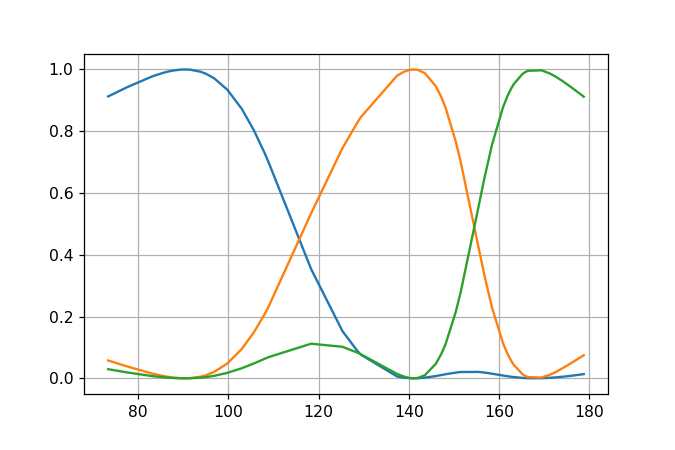

In [9]:
class_1_R = final_u_R[0]
class_2_R = final_u_R[1]
class_3_R = final_u_R[2]

R, class_1_R, class_2_R, class_3_R = zip(*sorted(zip(R, class_1_R, class_2_R, class_3_R))) 

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
line1 = plt.plot(R, class_1_R)
line2 = plt.plot(R, class_2_R)
line3 = plt.plot(R, class_3_R)

plt.grid(True)
plt.show()

In [10]:
cntr_G, final_u_G, _, _, _, _, _ = skfuzzy.cluster.cmeans(np.reshape(G, (-1, 60)), c=3, m=2, error=0.005, maxiter=1000)

cntr_G, final_u_G = zip(*sorted(zip(cntr_G, final_u_G))) 

print(cntr_G)
pd.DataFrame(final_u_G)

(array([105.18043869]), array([126.71961113]), array([141.59666469]))


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.97385,0.821745,0.984616,0.993432,0.985003,0.798812,0.996516,0.221839,0.855739,0.018669,...,0.000396,0.014204,0.210557,0.020776,0.000003,0.014813,0.012620,0.000619,0.012308,0.000169
1,0.01877,0.141962,0.011649,0.004936,0.010853,0.133736,0.002553,0.696189,0.098061,0.959583,...,0.998686,0.924435,0.708455,0.083569,0.000021,0.063364,0.055385,0.003994,0.054220,0.000975
2,0.00738,0.036293,0.003736,0.001632,0.004145,0.067451,0.000931,0.081972,0.046200,0.021748,...,0.000918,0.061361,0.080988,0.895655,0.999976,0.921822,0.931995,0.995387,0.933472,0.998857


<IPython.core.display.Javascript object>


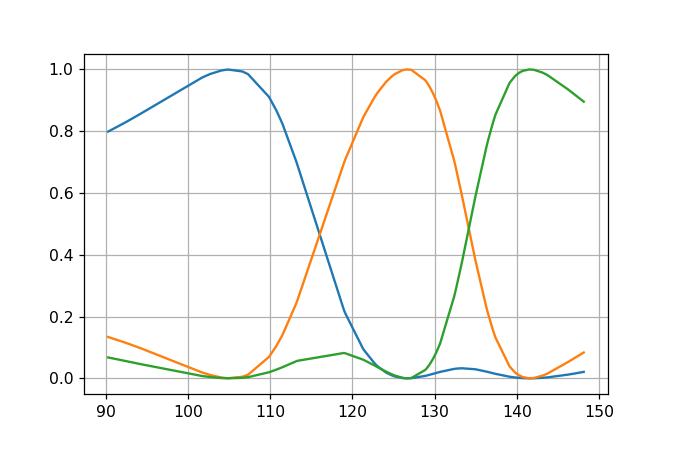

In [11]:
class_1_G = final_u_G[0]
class_2_G = final_u_G[1]
class_3_G = final_u_G[2]
G, class_1_G, class_2_G, class_3_G = zip(*sorted(zip(G, class_1_G, class_2_G, class_3_G))) 

plt.figure()
line1 = plt.plot(G, class_1_G)
line2 = plt.plot(G, class_2_G)
line3 = plt.plot(G, class_3_G)

plt.grid(True)
plt.show()

In [12]:
cntr_B, final_u_B, _, _, _, _, _ = skfuzzy.cluster.cmeans(np.reshape(B, (-1, 60)), c=3, m=2, error=0.005, maxiter=1000)

cntr_B, final_u_B = zip(*sorted(zip(cntr_B, final_u_B))) 

print(cntr_B)
pd.DataFrame(final_u_B)

(array([26.27953513]), array([36.15358476]), array([46.33169908]))


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.283898,0.290860,0.234817,0.987083,0.219803,0.998943,0.360651,0.004070,0.983689,0.021799,...,0.914998,0.891898,0.879792,0.039011,0.005739,0.042837,0.022951,0.056099,0.024865,0.009170
1,0.665028,0.657841,0.716378,0.010175,0.732351,0.000856,0.586918,0.990912,0.012811,0.936258,...,0.064217,0.091661,0.089367,0.103939,0.026016,0.292712,0.126042,0.639583,0.071607,0.043498
2,0.051074,0.051299,0.048805,0.002743,0.047846,0.000202,0.052431,0.005018,0.003500,0.041943,...,0.020785,0.016440,0.030841,0.857051,0.968245,0.664451,0.851007,0.304318,0.903528,0.947332


<IPython.core.display.Javascript object>


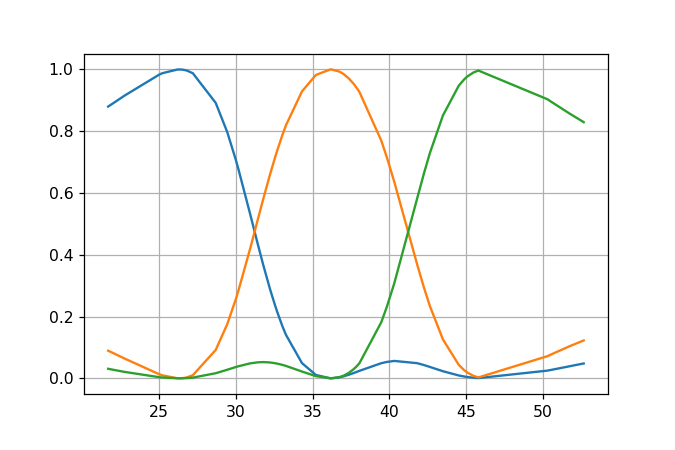

In [13]:
class_1_B = final_u_B[0]
class_2_B = final_u_B[1]
class_3_B = final_u_B[2]

B, class_1_B, class_2_B, class_3_B = zip(*sorted(zip(B, class_1_B, class_2_B, class_3_B))) 

plt.figure()
line1 = plt.plot(B, class_1_B)
line2 = plt.plot(B, class_2_B)
line2 = plt.plot(B, class_3_B)

plt.grid(True)
plt.show()

## Mamdani FIS

In [14]:
# Create variebles for antecedent(conditions) and consequent(conclusion) 
red = ctrl.Antecedent(np.arange(0,256,0.01), 'red')
green = ctrl.Antecedent(np.arange(0,256,0.01), 'green')
blue = ctrl.Antecedent(np.arange(0,256,0.01), 'blue')

ripeness = ctrl.Consequent(np.arange(0, 91, 1), 'ripeness')

X = X.values.tolist()
y = y.values.tolist()

<IPython.core.display.Javascript object>


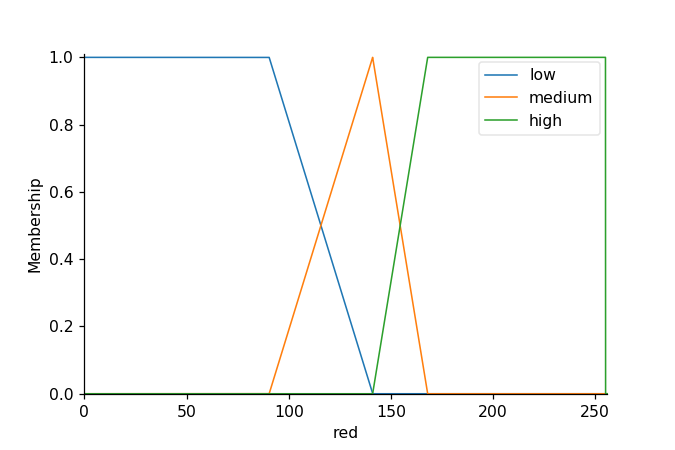

In [15]:
# Create membership function for antecedent-red
red['low'] = fuzz.trapmf(red.universe, [0, 0, 90.42, 141.06])
red['medium'] = fuzz.trimf(red.universe, [90.42, 141.06, 167.95])
red['high'] = fuzz.trapmf(red.universe, [141.06, 167.95, 255, 255])

red.view()

<IPython.core.display.Javascript object>


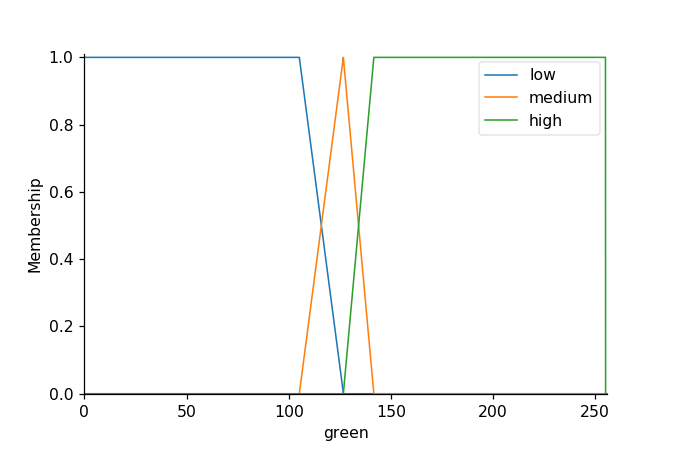

In [16]:
# Create membership function for antecedent-red
green['low'] = fuzz.trapmf(green.universe, [0, 0, 105.18, 126.72])
green['medium'] = fuzz.trimf(green.universe, [105.18, 126.72, 141.60])
green['high'] = fuzz.trapmf(green.universe, [126.72, 141.60, 255, 255])

green.view()

<IPython.core.display.Javascript object>


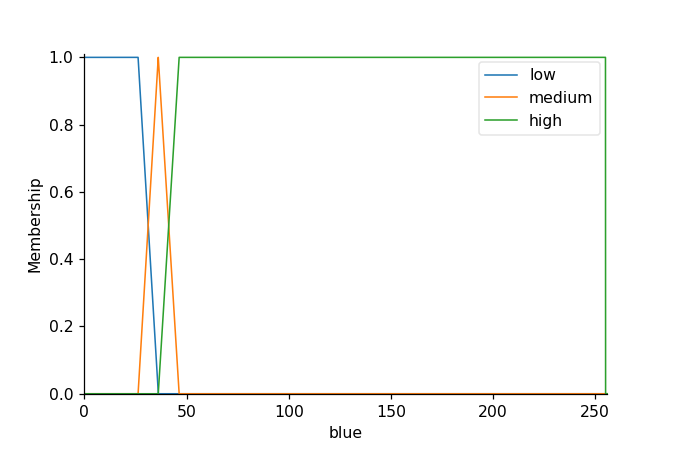

In [17]:
# Create membership function for antecedent-red
blue['low'] = fuzz.trapmf(blue.universe, [0, 0, 26.28, 36.15])
blue['medium'] = fuzz.trimf(blue.universe, [26.28, 36.15, 46.33])
blue['high'] = fuzz.trapmf(blue.universe, [36.15, 46.33, 255, 255])

blue.view()

<IPython.core.display.Javascript object>


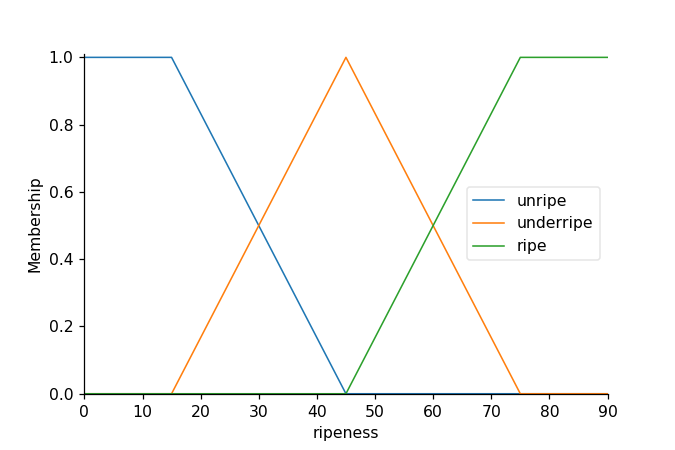

In [18]:
# Create membership function for antecedent-green
ripeness['unripe'] = fuzz.trapmf(ripeness.universe, [0, 0, 15, 45])
ripeness['underripe'] = fuzz.trimf(ripeness.universe, [15, 45, 75])
ripeness['ripe'] = fuzz.trapmf(ripeness.universe, [45, 75, 90, 90])

ripeness.view()

In [19]:
rule1 = ctrl.Rule(red['low'] & green['low'] & blue['low'], ripeness['unripe'])
rule2 = ctrl.Rule(red['low'] & green['low'] & blue['medium'], ripeness['unripe'])
rule3 = ctrl.Rule(red['low'] & green['medium'] & blue['medium'], ripeness['unripe'])

rule4 = ctrl.Rule(red['medium'] & green['low'] & blue['low'], ripeness['underripe'])
rule5 = ctrl.Rule(red['medium'] & green['medium'] & blue['medium'], ripeness['underripe'])
rule6 = ctrl.Rule(red['medium'] & green['medium'] & blue['high'], ripeness['underripe'])
rule7 = ctrl.Rule(red['medium'] & green['high'] & blue['medium'], ripeness['underripe'])
rule8 = ctrl.Rule(red['medium'] & green['high'] & blue['high'], ripeness['underripe'])

rule9 = ctrl.Rule(red['high'] & green['medium'] & blue['low'], ripeness['ripe'])
rule10 = ctrl.Rule(red['high'] & green['medium'] & blue['medium'], ripeness['ripe'])
rule11 = ctrl.Rule(red['high'] & green['high'], ripeness['ripe'])

In [20]:
Cntrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])

Ripeness = ctrl.ControlSystemSimulation(Cntrl_sys)

accuracy_count = 0

for i in range(len(X)):

    Ripeness.input['red'] = X[i][0]
    Ripeness.input['green'] = X[i][1]
    Ripeness.input['blue'] = X[i][2]

    Ripeness.compute()
    
    class_ripeness = Ripeness.output['ripeness']
    if class_ripeness <= 30:
        encoder_class = 1
    elif class_ripeness >30 and class_ripeness < 60:
        encoder_class = 2
    else:
        encoder_class = 3
        
    if y[i][0] == encoder_class:
        accuracy_count += 1
        
    print(str(X[i][0])+" "+str(X[i][1])+" "+str(X[i][0])+" "+str(y[i][0])+" "+str(encoder_class))
    
print("\nAccuracy: " + str(accuracy_count/len(X)*100))

86.04728829999999 101.7080501 86.04728829999999 1 1
93.8999267 111.50446709999999 93.8999267 1 1
89.63474147 107.2933972 89.63474147 1 1
85.71568857 106.59877009999998 85.71568857 1 1
83.38961526 102.65439930000001 83.38961526 1 1
73.38940732 90.26391692 73.38940732 1 1
83.04773779 104.0321402 83.04773779 1 1
96.85963883 118.94797779999999 96.85963883 1 1
77.49537714 94.15777281 77.49537714 1 1
108.83938059999998 124.08300990000002 108.83938059999998 1 2
99.75396459 121.2629571 99.75396459 1 1
94.9896879 113.1408147 94.9896879 1 1
86.7946125 104.74527259999999 86.7946125 1 1
90.91286621 109.83611210000001 90.91286621 1 1
102.9713373 121.4198128 102.9713373 1 1
105.690154 124.79520790000001 105.690154 1 1
108.02105630000001 125.14866599999999 108.02105630000001 1 1
87.88080854 104.85203059999999 87.88080854 1 1
77.62110818 92.45925871 77.62110818 1 1
91.54824579 110.7249983 91.54824579 1 1
143.55417309999999 137.075826 143.55417309999999 2 2
158.4484175 146.2451929 158.4484175 2 3
148.1